# **Goal:** 
Use classification models to predict whether an individual seeks treatment for mental health issues based on survey features like *age, gender, family history, work interference, and remote work.*

## 1. Import Libraries

In [1]:
import sys
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/scripts')
from data_cleaning import load_and_clean

## 2. Load Cleaned Data

In [2]:
df = pd.read_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/processed/mental_health_cleaned.csv')
df = df[df['treatment'].isin([0, 1])]

## 3. Feature Selection

In [3]:
# Choose features for modeling
features = ['Age', 'family_history', 'remote_work', 'Work_Interfere_Encoded', 'Gender_Encoded']

X = df[features]
y = df['treatment']

## 4. Train-Test Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## 5. Model Training - Random Forest Classifier

In [5]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## 6. Model Evaluation

Accuracy: 0.776
ROC-AUC: 0.7757936507936508

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77       124
           1       0.77      0.80      0.78       126

    accuracy                           0.78       250
   macro avg       0.78      0.78      0.78       250
weighted avg       0.78      0.78      0.78       250



Text(0.5, 1.0, 'Confusion Matrix')

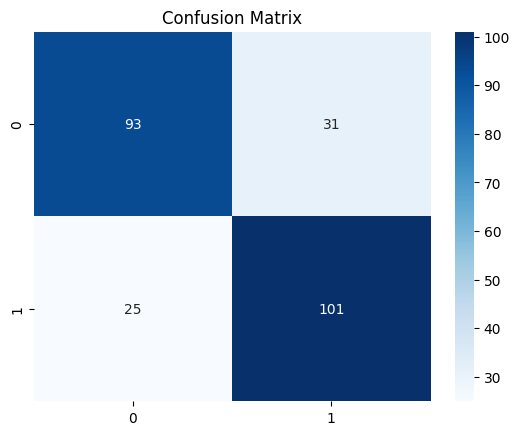

In [6]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")

## 7. Feature Importance

Text(0.5, 1.0, 'Feature Importance – Random Forest')

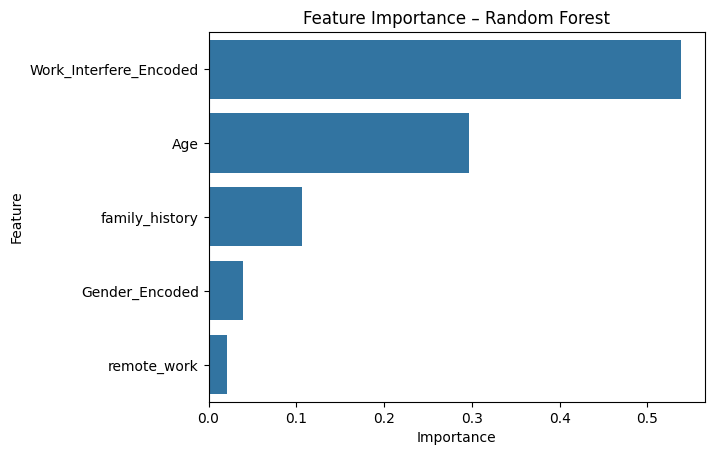

In [7]:
importances = model.feature_importances_
feature_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(data=feature_df, x='Importance', y='Feature')
plt.title('Feature Importance – Random Forest')

## 8. Save this data for Tableau

In [8]:
feature_df.to_csv('/home/srs/Desktop/IITM/Projects/mental_health_in_tech/data/processed/feature_importance.csv', index=False)
print("Feature Importance data saved for Tableau.")

Feature Importance data saved for Tableau.
